In [1]:
import data_aggregator as dr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from pprint import *
%matplotlib inline

In [6]:
filepath = 'data/dataset_mood_smartphone.csv'

data_aggregator = dr.DataAggregator(filepath)

data opened


In [ ]:

window_size = 5
data, target, _, _, _ = data_aggregator.read(method='separate')

2014-02-17 2014-02-12 00:00:00 2014-02-17
2014-02-18 2014-02-13 00:00:00 2014-02-18
nan
nan
nan
nan
nan
1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
                         Unnamed: 0       id variable  value
time                                                        
2014-02-18 09:29:51.257      136473  AS14.01     call    1.0
2014-02-19 2014-02-14 00:00:00 2014-02-19
nan
nan
nan
nan
nan
1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
                         Unnamed: 0       id variable  value
time                                                        
2014-02-18 09:29:51.257      136473  AS14.01     call    1.0
nan
nan
nan
nan
nan
1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
                         Unnamed: 0       id variable  value
time                                                        
2014-02-19 14:43:30.575      136474  AS14.01     call    1.0
2014-02-19 17:29:10.378      136475  AS14.01     call    1.0
2014-02-19 17:42:16.499      136476 

Counter({7: 0.5147058823529411, 6: 0.3269230769230769, 8: 0.09502262443438914, 5: 0.05203619909502263, 3: 0.005656108597285068, 4: 0.004524886877828055, 9: 0.0011312217194570137})
normal weighted: 0.4773 | 0.9150
normal: 0.4887 | 0.9364
random forest: 0.5441 | 0.6731


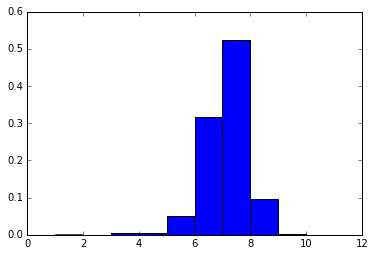

In [25]:
scores = OrderedDict()
scores['normal weighted'] = {'score':[], 'mse':[]}
scores['normal'] = {'score':[], 'mse':[]}
scores['random forest'] = {'score':[], 'mse':[]}

for i in range(10):
    data_train, data_test, target_train, target_test = cross_validation.train_test_split(data, target,
                                                                                             test_size=0.3)

    # target_train = np.append(target_train, [10])
    if i == 1:
        plt.hist(target_train, bins=range(1,12),  normed=True)
    weights = Counter(target_train.tolist())
    total = sum(weights.values(), 0.0)
    for key in weights:
        weights[key] /= total

    clfw = DecisionTreeClassifier(class_weight=weights)
    clf = DecisionTreeClassifier()
    rfc = RandomForestClassifier(n_estimators = 20)
    clfw = clfw.fit(data_train, target_train)
    clf          = clf.fit(data_train, target_train)
    rfc          = rfc.fit(data_train, target_train)


    scores['normal weighted']['score'].append(clfw.score(data_test, target_test))
    scores['normal weighted']['mse'].append(metrics.mean_squared_error(target_test, clfw.predict(data_test)))
    scores['normal']['score'].append(clf.score(data_test, target_test))
    scores['normal']['mse'].append(metrics.mean_squared_error(target_test, clf.predict(data_test)))
    scores['random forest']['score'].append(rfc.score(data_test, target_test))
    scores['random forest']['mse'].append(metrics.mean_squared_error(target_test, rfc.predict(data_test)))


print weights
for k,v in scores.items():
    print "%s: %.4f | %.4f" % (k, np.mean(v['score']), np.mean(v['mse']))
plt.show()